In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-1000-highest-grossing-movies/Highest Holywood Grossing Movies.csv


Overall visualization of movie budget. 2019 had the highest movie budget

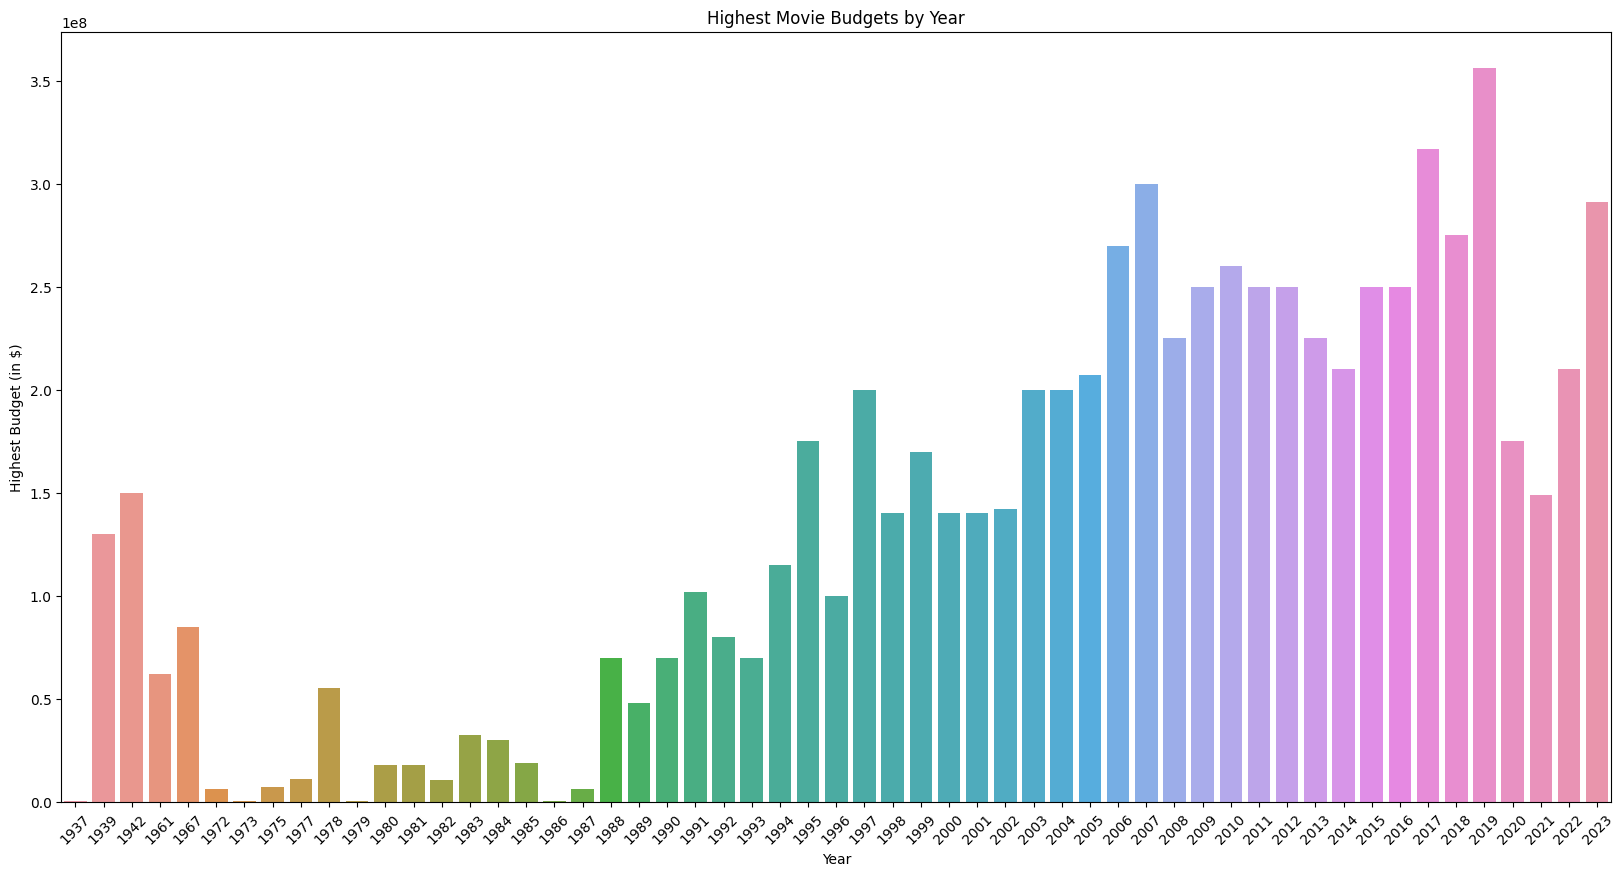

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
top_movies_df = pd.read_csv("/kaggle/input/top-1000-highest-grossing-movies/Highest Holywood Grossing Movies.csv")

# Clean the budget column and convert to numeric
top_movies_df['budget'] = pd.to_numeric(top_movies_df['Budget (in $)'].str.replace('[^\d]', '', regex=True), errors='coerce')

# Drop rows with NaN values in the budget column
top_movies_df.dropna(subset=['budget'], inplace=True)

# Group by year and find the maximum budget for each year
highest_budget_by_year = top_movies_df.groupby('Year')['budget'].max().reset_index()

# Sort the DataFrame by budget in descending order
highest_budget_by_year = highest_budget_by_year.sort_values(by='budget', ascending=False)
# Create a color gradient
norm = plt.Normalize(highest_budget_by_year['budget'].min(), highest_budget_by_year['budget'].max())
colors = plt.cm.Blues(norm(highest_budget_by_year['budget']))

# Plotting
plt.figure(figsize=(20, 10))
sns.barplot(data=highest_budget_by_year, x='Year', y='budget')
plt.title('Highest Movie Budgets by Year')
plt.xlabel('Year')
plt.ylabel('Highest Budget (in $)')
plt.xticks(rotation=45)
plt.show()


Comparative graphs of which decades had the highest budget.

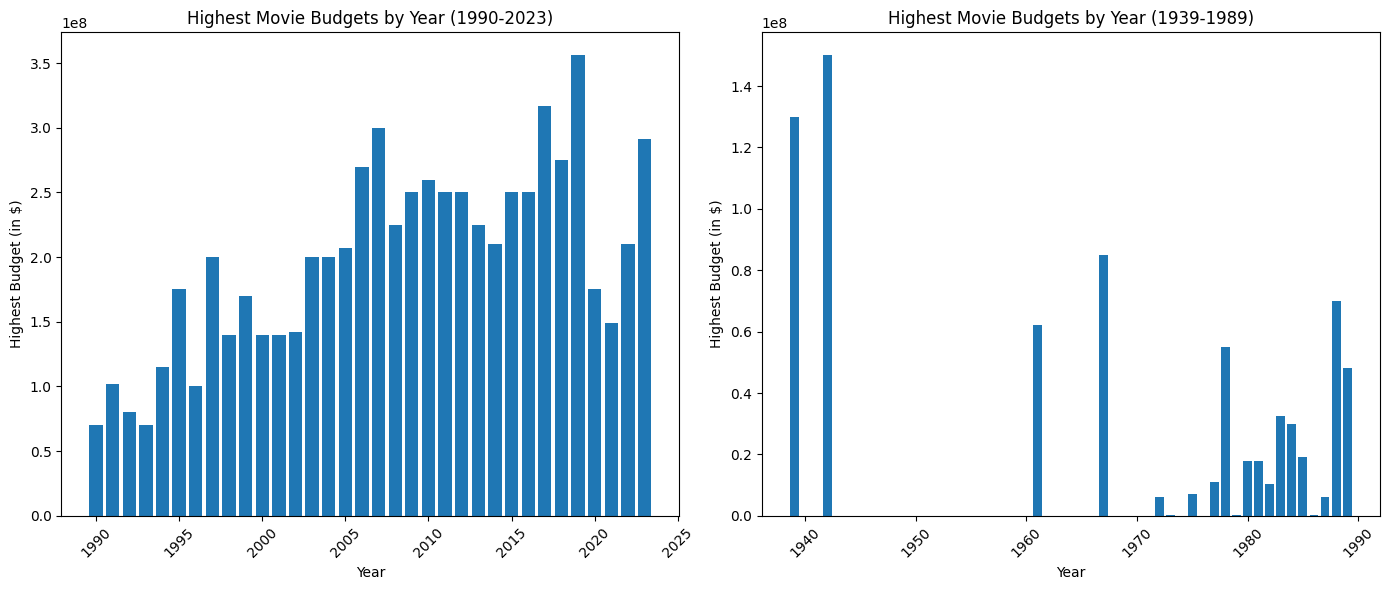

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
top_movies_df = pd.read_csv("/kaggle/input/top-1000-highest-grossing-movies/Highest Holywood Grossing Movies.csv")

# Clean the budget column and convert to numeric
top_movies_df['budget'] = pd.to_numeric(top_movies_df['Budget (in $)'].str.replace('[^\d]', '', regex=True), errors='coerce')

# Drop rows with NaN values in the budget column
top_movies_df.dropna(subset=['budget'], inplace=True)

# Group by year and find the maximum budget for each year
highest_budget_by_year = top_movies_df.groupby('Year')['budget'].max().reset_index()

# Filter for 1990 to 2023
budget_1990s = highest_budget_by_year[(highest_budget_by_year['Year'] >= 1990) & (highest_budget_by_year['Year'] <= 2023)]

# Filter for 1939 to 1989
budget_1930s = highest_budget_by_year[(highest_budget_by_year['Year'] >= 1939) & (highest_budget_by_year['Year'] <= 1989)]

# Set up the figure and subplots
plt.figure(figsize=(14, 6))

# Bar plot for 1990 to 2023
plt.subplot(1, 2, 1)
norm_1990s = plt.Normalize(budget_1990s['budget'].min(), budget_1990s['budget'].max())
plt.bar(budget_1990s['Year'], budget_1990s['budget'])
plt.title('Highest Movie Budgets by Year (1990-2023)')
plt.xlabel('Year')
plt.ylabel('Highest Budget (in $)')
plt.xticks(rotation=45)

# Bar plot for 1939 to 1989
plt.subplot(1, 2, 2)
norm_1930s = plt.Normalize(budget_1930s['budget'].min(), budget_1930s['budget'].max())
plt.bar(budget_1930s['Year'], budget_1930s['budget'])
plt.title('Highest Movie Budgets by Year (1939-1989)')
plt.xlabel('Year')
plt.ylabel('Highest Budget (in $)')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


Shows movies with the largest budgets from 2010-2023 and 1939-1989 with hue showing the amount of movies produced within those years. 2017 had the most movies

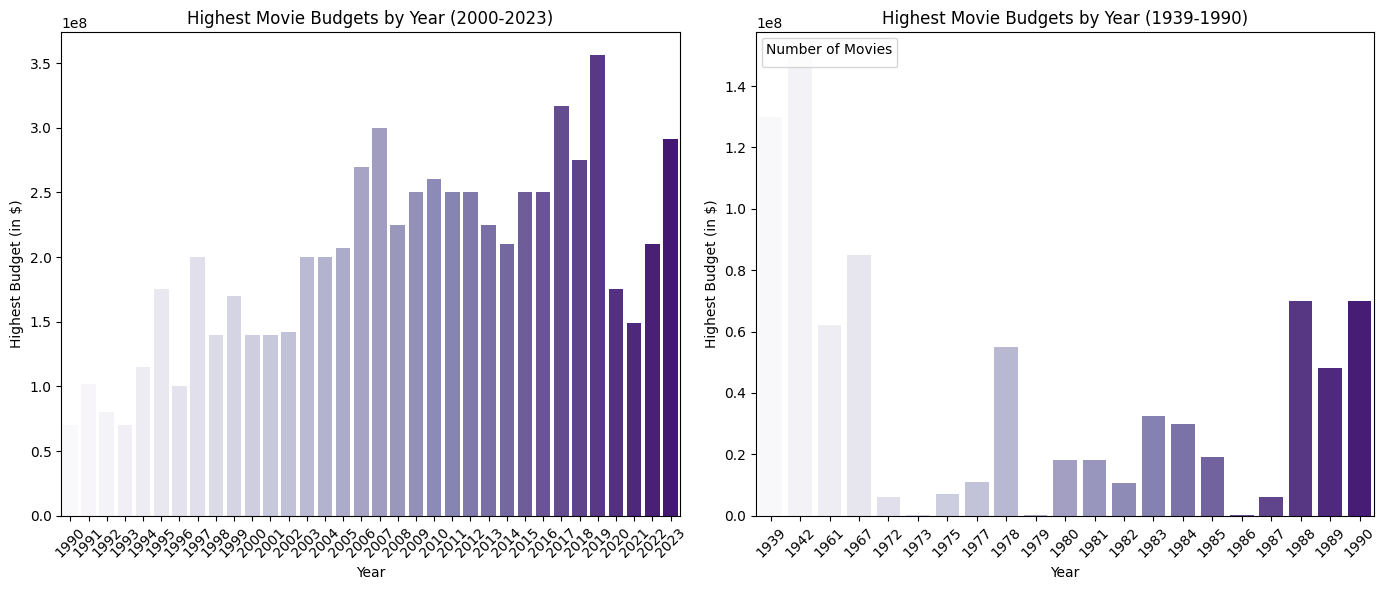

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
top_movies_df = pd.read_csv("/kaggle/input/top-1000-highest-grossing-movies/Highest Holywood Grossing Movies.csv")

# Clean the budget column and convert to numeric
top_movies_df['budget'] = pd.to_numeric(top_movies_df['Budget (in $)'].str.replace('[^\d]', '', regex=True), errors='coerce')

# Drop rows with NaN values in the budget column
top_movies_df.dropna(subset=['budget'], inplace=True)

# Group by year and find the maximum budget for each year
highest_budget_by_year = top_movies_df.groupby('Year')['budget'].max().reset_index()

# Count the number of movies per year
movie_counts_by_year = top_movies_df.groupby('Year').size().reset_index(name='Number of Movies')

# Merge the highest budget and movie counts
merged_data = pd.merge(highest_budget_by_year, movie_counts_by_year, on='Year')

# Filter for 2000 to 2023
budget_2000s = merged_data[(merged_data['Year'] == 2000) & (merged_data['Year'] <= 2023)]

# Filter for 1939 to 1989
budget_1930s = merged_data[(merged_data['Year'] >= 1939) & (merged_data['Year'] <= 1990)]

# Set up the figure and subplots
plt.figure(figsize=(14, 6))

# Bar plot for 1990 to 2023
plt.subplot(1, 2, 1)
sns.barplot(data=budget_1990s, x='Year', y='budget',palette='Purples')
plt.title('Highest Movie Budgets by Year (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Highest Budget (in $)')
plt.xticks(rotation=45)

# Bar plot for 1939 to 1989
plt.subplot(1, 2, 2)
sns.barplot(data=budget_1930s, x='Year', y='budget',palette='Purples')
plt.title('Highest Movie Budgets by Year (1939-1990)')
plt.xlabel('Year')
plt.ylabel('Highest Budget (in $)')
plt.xticks(rotation=45)
plt.legend(title='Number of Movies', fontsize='small', title_fontsize='medium', loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()



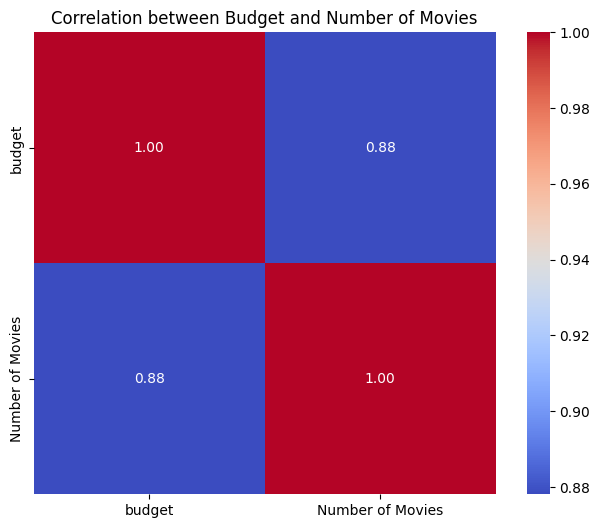

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
top_movies_df = pd.read_csv("/kaggle/input/top-1000-highest-grossing-movies/Highest Holywood Grossing Movies.csv")

# Clean the budget column and convert to numeric
top_movies_df['budget'] = pd.to_numeric(top_movies_df['Budget (in $)'].str.replace('[^\d]', '', regex=True), errors='coerce')

# Drop rows with NaN values in the budget column
top_movies_df.dropna(subset=['budget'], inplace=True)
# Count the number of movies per year and the max budget
movie_counts_by_year= top_movies_df.groupby('Year').agg({'budget': 'max', 'Title': 'count'}).reset_index()
movie_counts_by_year.rename(columns={'Title': 'Number of Movies'}, inplace=True)
correlation_matrix = movie_counts_by_year[['budget', 'Number of Movies']].corr()

# Set up the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation between Budget and Number of Movies')
plt.show()

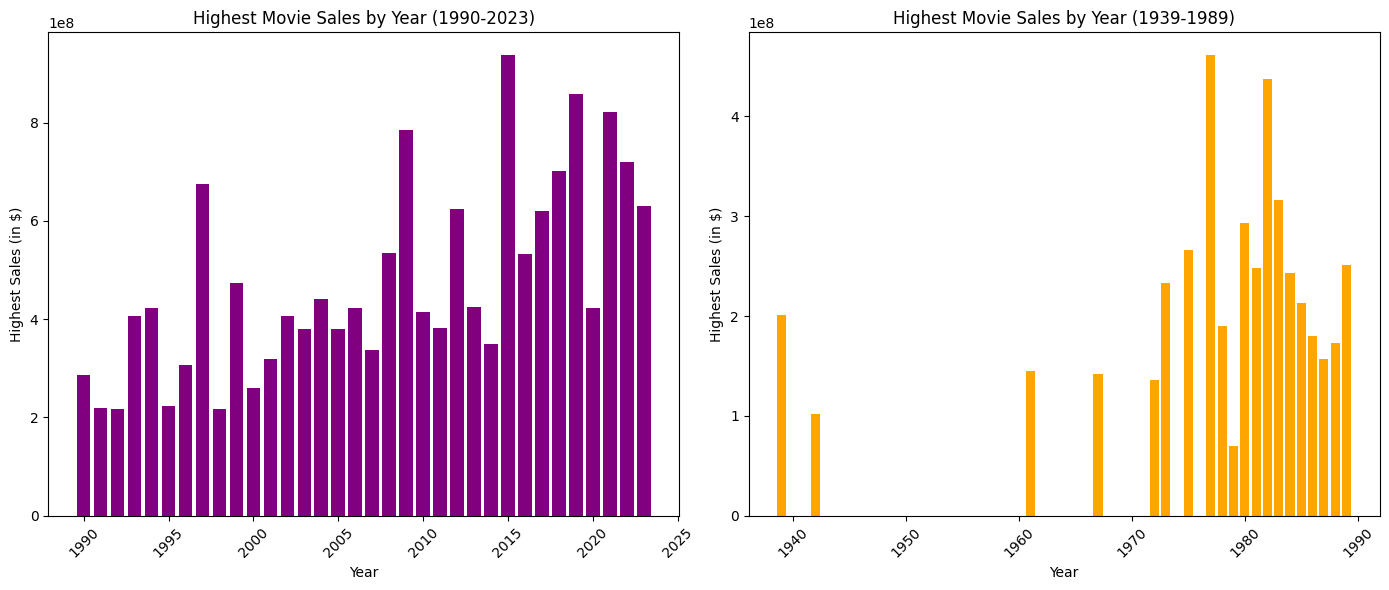

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
top_movies_df = pd.read_csv("/kaggle/input/top-1000-highest-grossing-movies/Highest Holywood Grossing Movies.csv")

# Clean the budget column and convert to numeric
top_movies_df['budget'] = pd.to_numeric(top_movies_df['Budget (in $)'].str.replace('[^\d]', '', regex=True), errors='coerce')

# Clean the Domestic Sales column and convert to numeric
top_movies_df['sales'] = pd.to_numeric(top_movies_df['Domestic Sales (in $)'], errors='coerce')

# Drop rows with NaN values in the budget and sales columns
top_movies_df.dropna(subset=['budget', 'sales'], inplace=True)

# Group by year and find the maximum sales for each year
highest_sales_by_year = top_movies_df.groupby('Year')['sales'].max().reset_index()

# Filter for 1990 to 2023
sales_1990s = highest_sales_by_year[(highest_sales_by_year['Year'] >= 1990) & (highest_sales_by_year['Year'] <= 2023)]

# Filter for 1939 to 1989
sales_1930s = highest_sales_by_year[(highest_sales_by_year['Year'] >= 1939) & (highest_sales_by_year['Year'] <= 1989)]

# Set up the figure and subplots
plt.figure(figsize=(14, 6))

# Bar plot for 1990 to 2023
plt.subplot(1, 2, 1)
plt.bar(sales_1990s['Year'], sales_1990s['sales'], color='purple')
plt.title('Highest Movie Sales by Year (1990-2023)')
plt.xlabel('Year')
plt.ylabel('Highest Sales (in $)')
plt.xticks(rotation=45)

# Bar plot for 1939 to 1989
plt.subplot(1, 2, 2)
plt.bar(sales_1930s['Year'], sales_1930s['sales'], color='orange')
plt.title('Highest Movie Sales by Year (1939-1989)')
plt.xlabel('Year')
plt.ylabel('Highest Sales (in $)')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


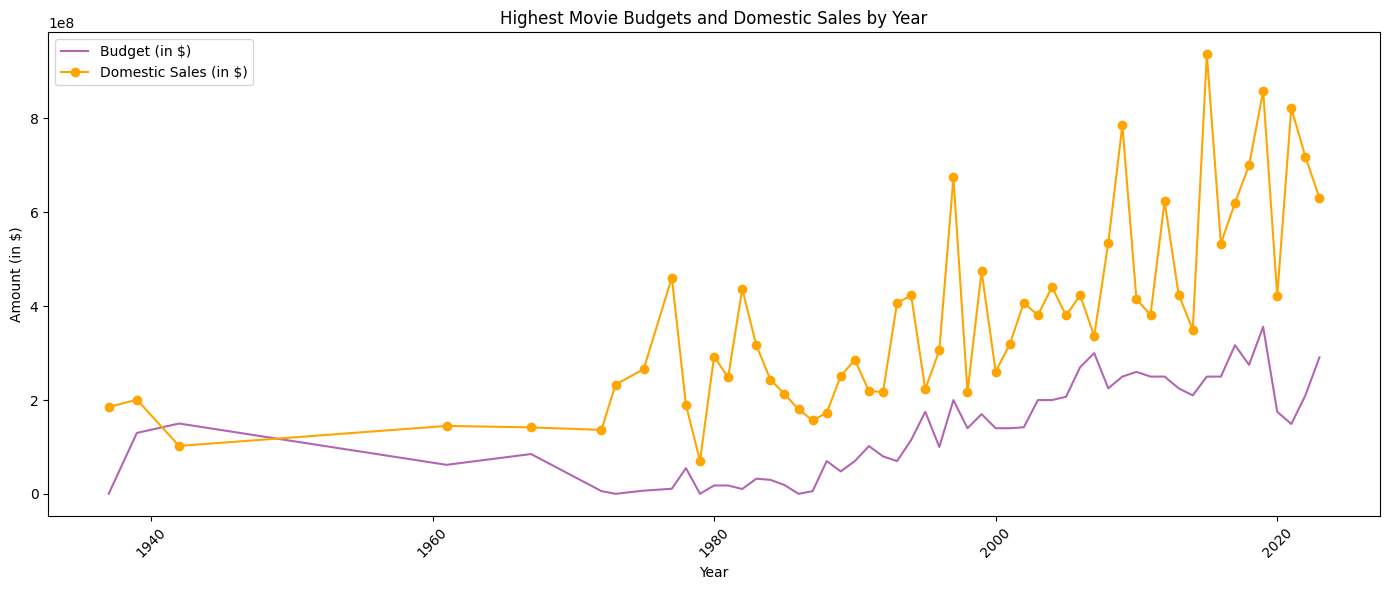

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
top_movies_df = pd.read_csv("/kaggle/input/top-1000-highest-grossing-movies/Highest Holywood Grossing Movies.csv")

# Clean the budget column and convert to numeric
top_movies_df['budget'] = pd.to_numeric(top_movies_df['Budget (in $)'].str.replace('[^\d]', '', regex=True), errors='coerce')

# Clean the Domestic Sales column and convert to numeric
top_movies_df['sales'] = pd.to_numeric(top_movies_df['Domestic Sales (in $)'], errors='coerce')

# Drop rows with NaN values in the budget and sales columns
top_movies_df.dropna(subset=['budget', 'sales'], inplace=True)

# Group by year and find the maximum budget and sales for each year
highest_budget_sales_by_year = top_movies_df.groupby('Year').agg({'budget': 'max', 'sales': 'max'}).reset_index()

# Set up the figure
plt.figure(figsize=(14, 6))

# Bar plot for budget
plt.plot(highest_budget_sales_by_year['Year'], highest_budget_sales_by_year['budget'], color='purple', alpha=0.6, label='Budget (in $)')

# Line plot for sales
plt.plot(highest_budget_sales_by_year['Year'], highest_budget_sales_by_year['sales'], color='orange', marker='o', label='Domestic Sales (in $)')

# Titles and labels
plt.title('Highest Movie Budgets and Domestic Sales by Year')
plt.xlabel('Year')
plt.ylabel('Amount (in $)')
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


Chart showing budget, domestic and foregin revenue

<Figure size 1200x600 with 0 Axes>

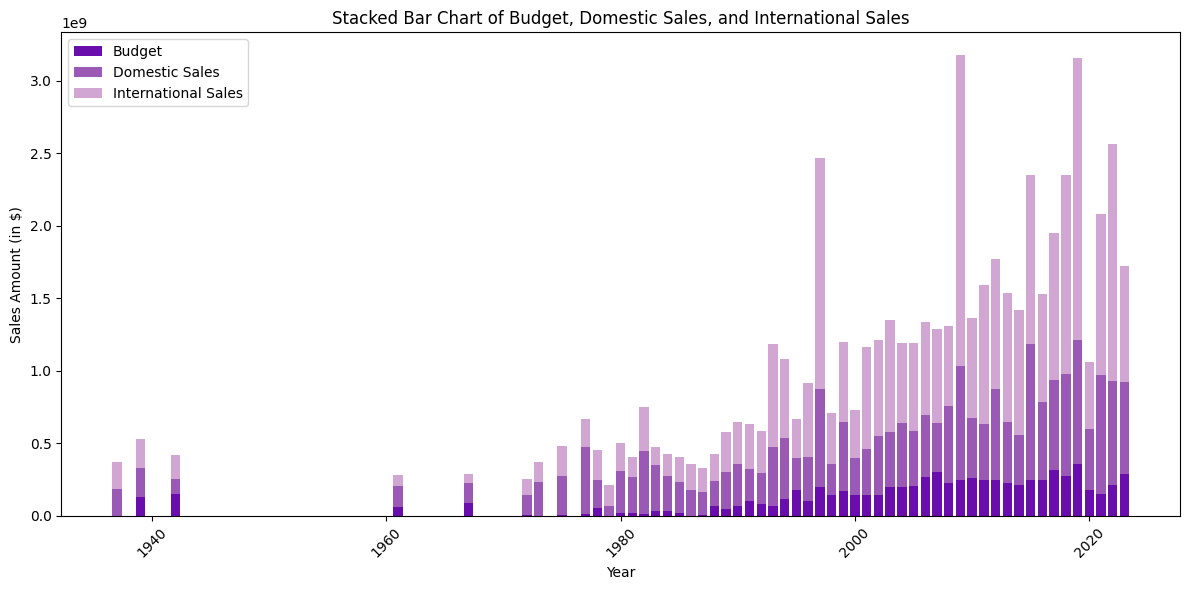

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
top_movies_df = pd.read_csv("/kaggle/input/top-1000-highest-grossing-movies/Highest Holywood Grossing Movies.csv")

# Clean the budget column and convert to numeric
top_movies_df['budget'] = pd.to_numeric(top_movies_df['Budget (in $)'].str.replace('[^\d]', '', regex=True), errors='coerce')

# Clean the Domestic Sales column and convert to numeric
top_movies_df['sales'] = pd.to_numeric(top_movies_df['Domestic Sales (in $)'], errors='coerce')

# Clean the International Sales column and convert to numeric
top_movies_df['int_sales'] = pd.to_numeric(top_movies_df['International Sales (in $)'], errors='coerce')
# Drop rows with NaN values in the budget and sales columns
top_movies_df.dropna(subset=['budget', 'sales', 'int_sales'], inplace=True)

# Group by year and find the maximum budget and sales for each year
highest_budget_sales_by_year = top_movies_df.groupby('Year').agg({'budget': 'max', 'sales': 'max'}).reset_index()
#Group by year and find the maximum budget and international sales for each year
highest_int_sales_by_year = top_movies_df.groupby('Year').agg({'budget': 'max', 'int_sales': 'max'}).reset_index()

# Set the figure size for better visibility
plt.figure(figsize=(12, 6))

# Set the figure size for better visibility
plt.figure(figsize=(12, 6))

# Create a stacked bar chart with shades of purple
plt.bar(highest_budget_sales_by_year['Year'], highest_budget_sales_by_year['budget'], label='Budget', color='#6a0dad')  # Dark Purple
plt.bar(highest_budget_sales_by_year['Year'], highest_budget_sales_by_year['sales'], 
         bottom=highest_budget_sales_by_year['budget'], label='Domestic Sales', color='#9b59b6')  # Medium Purple
plt.bar(highest_int_sales_by_year['Year'], highest_int_sales_by_year['int_sales'], 
         bottom=highest_budget_sales_by_year['budget'] + highest_budget_sales_by_year['sales'], 
         label='International Sales', color='#d2a6d2')  # Light Purple

# Add title and labels
plt.title('Stacked Bar Chart of Budget, Domestic Sales, and International Sales')
plt.xlabel('Year')
plt.ylabel('Sales Amount (in $)')

# Add a legend
plt.legend()

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()
